   # Title

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.inspection import inspect
from config import username, password, host, port, protocol
import matplotlib.pyplot as plt


## Extract files into DataFrames 

In [2]:
# Read population_2019 CSV Head
population_2019 = "export-2019.csv"
population_2019_df = pd.read_csv(population_2019)
population_2019_df.head()

,Row,FIPS,GENC,Country/Area Name,Year,Population,Male Population,Female Population,Annual Growth Rate %,Crude Death Rate
0,1,AF,AF,Afghanistan,2019,35739709,18104807,17634902,2.362,13.03
1,2,AL,AL,Albania,2019,3072944,1517301,1555643,0.271,7.07
2,3,AG,DZ,Algeria,2019,42305560,21432545,20873015,1.554,4.32
3,4,AQ,AS,American Samoa,2019,48456,24190,24266,-2.165,5.88
4,5,AN,AD,Andorra,2019,85782,44048,41734,-0.054,7.65


In [3]:
# Read population_2020 CSV Head
population_2020= "export-2020.csv"
population_2020_df = pd.read_csv(population_2020)
population_2020_df.head()

,Row,FIPS,GENC,Country/Area Name,Year,Population,Male Population,Female Population,Annual Growth Rate %,Crude Death Rate
0,1,AF,AF,Afghanistan,2020,36594776,18533655,18061121,2.366,12.80
1,2,AL,AL,Albania,2020,3080930,1520677,1560253,0.248,7.23
2,3,AG,DZ,Algeria,2020,42952039,21760954,21191085,1.480,4.33
3,4,AQ,AS,American Samoa,2020,47392,23632,23760,-2.277,5.89
4,5,AN,AD,Andorra,2020,85722,43983,41739,-0.084,7.82


In [4]:
# Read population_2021 CSV Head
population_2021= "export-2021.csv"
population_2021_df = pd.read_csv(population_2021)
population_2021_df.head()

,Row,FIPS,GENC,Country/Area Name,Year,Population,Male Population,Female Population,Annual Growth Rate %,Crude Death Rate
0,1,AF,AF,Afghanistan,2021,37466414,18970731,18495683,2.342,12.57
1,2,AL,AL,Albania,2021,3088385,1523753,1564632,0.235,7.27
2,3,AG,DZ,Algeria,2021,43576691,22078025,21498666,1.408,4.32
3,4,AQ,AS,American Samoa,2021,46366,23095,23271,-2.099,6.00
4,5,AN,AD,Andorra,2021,85645,43908,41737,-0.095,7.86


In [5]:
# Read population_2022 CSV Head
population_2022= "export-2022.csv"
population_2022_df = pd.read_csv(population_2022)
population_2022_df.head()

,Row,FIPS,GENC,Country/Area Name,Year,Population,Male Population,Female Population,Annual Growth Rate %,Crude Death Rate
0,1,AF,AF,Afghanistan,2022,38346720,19411986,18934734,2.304,12.33
1,2,AL,AL,Albania,2022,3095344,1526565,1568779,0.215,7.31
2,3,AG,DZ,Algeria,2022,44178884,22383554,21795330,1.337,4.32
3,4,AQ,AS,American Samoa,2022,45443,22612,22831,-1.919,6.10
4,5,AN,AD,Andorra,2022,85560,43828,41732,-0.104,7.92


In [6]:
# Read Inflation CSV Head
from sqlalchemy import true

WHO_global_data = "WHO-COVID-19-global-table-data1.csv"
WHO_global_data_df = pd.read_csv(WHO_global_data, sep=',')
WHO_global_data_df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,570005017,7312.875304,6637125,85.150948,1019583,6384128,81.905125,13148,0.168682,1882
1,United States of America,Americas,89428046,27017.320000,856441,258.741000,117592,1017366,307.359000,2529,0.764000,195
2,India,South-East Asia,43938764,3183.958000,135145,9.793000,18313,526167,38.128000,342,0.025000,57
3,Brazil,Americas,33621965,15817.678000,282150,132.739000,30609,677143,318.566000,1625,0.764000,179
4,France,Europe,32664720,50223.004000,454372,698.611000,87562,148254,227.945000,687,1.056000,119


## Transform DataFrames 

In [7]:
# Selecting only columns needed
population_2019_df_cols = ["Row", "Country/Area Name", "Year", "Population", "Male Population", "Female Population", "Annual Growth Rate %"]
population_2019_df_transformed = population_2019_df[population_2019_df_cols].copy()


# Rename the column headers
population_2019_df_transformed = population_2019_df_transformed.rename(columns={"Row": "id",
                                                                            "Country/Area Name": "country",
                                                                            "Year": "year",
                                                                            "Population": "population",
                                                                            "Male Population": "male_population",
                                                                            "Female Population": "female_population",
                                                                            "Annual Growth Rate %": "annual_growth_rate"})


# Set index
#population_2019_df_transformed.set_index(["year", "country"], inplace=True)

population_2019_df_transformed.head()

,id,country,year,population,male_population,female_population,annual_growth_rate
0,1,Afghanistan,2019,35739709,18104807,17634902,2.362
1,2,Albania,2019,3072944,1517301,1555643,0.271
2,3,Algeria,2019,42305560,21432545,20873015,1.554
3,4,American Samoa,2019,48456,24190,24266,-2.165
4,5,Andorra,2019,85782,44048,41734,-0.054


In [8]:
# Selecting only columns needed
population_2020_df_cols = ["Row", "Country/Area Name", "Year", "Population", "Male Population", "Female Population", "Annual Growth Rate %"]
population_2020_df_transformed = population_2020_df[population_2020_df_cols].copy()


# Rename the column headers
population_2020_df_transformed = population_2020_df_transformed.rename(columns={"Row": "id",
                                                                            "Country/Area Name": "country",
                                                                            "Year": "year",
                                                                            "Population": "population",
                                                                            "Male Population": "male_population",
                                                                            "Female Population": "female_population",
                                                                            "Annual Growth Rate %": "annual_growth_rate"})


# Set index
#population_2019_df_transformed.set_index(["year", "country"], inplace=True)

population_2020_df_transformed.head()

,id,country,year,population,male_population,female_population,annual_growth_rate
0,1,Afghanistan,2020,36594776,18533655,18061121,2.366
1,2,Albania,2020,3080930,1520677,1560253,0.248
2,3,Algeria,2020,42952039,21760954,21191085,1.480
3,4,American Samoa,2020,47392,23632,23760,-2.277
4,5,Andorra,2020,85722,43983,41739,-0.084


In [9]:
# Selecting only columns needed
population_2021_df_cols = ["Row", "Country/Area Name", "Year", "Population", "Male Population", "Female Population", "Annual Growth Rate %"]
population_2021_df_transformed = population_2021_df[population_2021_df_cols].copy()


# Rename the column headers
population_2021_df_transformed = population_2021_df_transformed.rename(columns={"Row": "id",
                                                                            "Country/Area Name": "country",
                                                                            "Year": "year",
                                                                            "Population": "population",
                                                                            "Male Population": "male_population",
                                                                            "Female Population": "female_population",
                                                                            "Annual Growth Rate %": "annual_growth_rate"})


# Set index
#population_2019_df_transformed.set_index(["year", "country"], inplace=True)

population_2021_df_transformed.head()

,id,country,year,population,male_population,female_population,annual_growth_rate
0,1,Afghanistan,2021,37466414,18970731,18495683,2.342
1,2,Albania,2021,3088385,1523753,1564632,0.235
2,3,Algeria,2021,43576691,22078025,21498666,1.408
3,4,American Samoa,2021,46366,23095,23271,-2.099
4,5,Andorra,2021,85645,43908,41737,-0.095


In [10]:
# Selecting only columns needed
population_2022_df_cols = ["Row", "Country/Area Name", "Year", "Population", "Male Population", "Female Population", "Annual Growth Rate %"]
population_2022_df_transformed = population_2022_df[population_2022_df_cols].copy()


# Rename the column headers
population_2022_df_transformed = population_2022_df_transformed.rename(columns={"Row": "id",
                                                                            "Country/Area Name": "country",
                                                                            "Year": "year",
                                                                            "Population": "population",
                                                                            "Male Population": "male_population",
                                                                            "Female Population": "female_population",
                                                                            "Annual Growth Rate %": "annual_growth_rate"})


# Set index
#population_2019_df_transformed.set_index(["year", "country"], inplace=True)

population_2022_df_transformed.head()

,id,country,year,population,male_population,female_population,annual_growth_rate
0,1,Afghanistan,2022,38346720,19411986,18934734,2.304
1,2,Albania,2022,3095344,1526565,1568779,0.215
2,3,Algeria,2022,44178884,22383554,21795330,1.337
3,4,American Samoa,2022,45443,22612,22831,-1.919
4,5,Andorra,2022,85560,43828,41732,-0.104


In [11]:
population_2022_df_transformed.dtypes

id                      int64
country                object
year                    int64
population              int64
male_population         int64
female_population       int64
annual_growth_rate    float64
dtype: object

In [12]:
# Selecting only columns needed
WHO_global_data_df_cols = ["Name", "WHO Region", "Cases - cumulative total", "Cases - newly reported in last 7 days", "Cases - newly reported in last 24 hours",
                         "Deaths - cumulative total", "Deaths - newly reported in last 7 days", "Deaths - newly reported in last 24 hours"]
WHO_global_data_df_transformed = WHO_global_data_df[WHO_global_data_df_cols].copy()


# Rename the column headers
WHO_global_data_df_transformed = WHO_global_data_df_transformed.rename(columns={"Name": "country", 
                                                                            "WHO Region": "region", 
                                                                            "Cases - cumulative total": "total_cases", 
                                                                            "Cases - newly reported in last 7 days": "cases_in_last_7days", 
                                                                            "Cases - newly reported in last 24 hours": "cases_in_last_24hrs",
                                                                            "Deaths - cumulative total": "total_deaths", 
                                                                            "Deaths - newly reported in last 7 days": "deaths_in_last_7days", 
                                                                            "Deaths - newly reported in last 24 hours": "deaths_in_last_24hrs"})


# Set index
#population_2019_df_transformed.set_index(["year", "country"], inplace=True)

WHO_global_data_df_transformed.head()

,country,region,total_cases,cases_in_last_7days,cases_in_last_24hrs,total_deaths,deaths_in_last_7days,deaths_in_last_24hrs
0,Global,NaN,570005017,6637125,1019583,6384128,13148,1882
1,United States of America,Americas,89428046,856441,117592,1017366,2529,195
2,India,South-East Asia,43938764,135145,18313,526167,342,57
3,Brazil,Americas,33621965,282150,30609,677143,1625,179
4,France,Europe,32664720,454372,87562,148254,687,119


### Create database connection

In [13]:
database_name="covid_db"
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)
inspector = inspect(engine)

In [14]:
# Confirm tables
inspector.get_table_names()

['population_2020',
 'population_2021',
 'population_2022',
 'global_data',
 'population_2019']

### Use pandas to load DataFrames into database

In [15]:
population_2019_df_transformed.to_sql(name='population_2019', con=engine, if_exists='replace', index=False)

In [16]:
population_2020_df_transformed.to_sql(name='population_2020', con=engine, if_exists='replace', index=False)

In [17]:
population_2021_df_transformed.to_sql(name='population_2021', con=engine, if_exists='replace', index=False)

In [18]:
population_2022_df_transformed.to_sql(name='population_2022', con=engine, if_exists='replace', index=False)

In [19]:
WHO_global_data_df_transformed.to_sql(name='global_data', con=engine, if_exists='replace', index=True)

### Confirm data has been added by querying the tables

In [20]:
pop_2019 =pd.read_sql_query("SELECT * FROM population_2019", con=engine)
pop_2019.head()

,id,country,year,population,male_population,female_population,annual_growth_rate
0,1,Afghanistan,2019,35739709,18104807,17634902,2.362
1,2,Albania,2019,3072944,1517301,1555643,0.271
2,3,Algeria,2019,42305560,21432545,20873015,1.554
3,4,American Samoa,2019,48456,24190,24266,-2.165
4,5,Andorra,2019,85782,44048,41734,-0.054


In [21]:
pop_2020 =pd.read_sql_query("SELECT * FROM population_2020", con=engine)
pop_2020.head()

,id,country,year,population,male_population,female_population,annual_growth_rate
0,1,Afghanistan,2020,36594776,18533655,18061121,2.366
1,2,Albania,2020,3080930,1520677,1560253,0.248
2,3,Algeria,2020,42952039,21760954,21191085,1.480
3,4,American Samoa,2020,47392,23632,23760,-2.277
4,5,Andorra,2020,85722,43983,41739,-0.084


In [22]:
pop_2021 =pd.read_sql_query("SELECT * FROM population_2021", con=engine)
pop_2021.head()

,id,country,year,population,male_population,female_population,annual_growth_rate
0,1,Afghanistan,2021,37466414,18970731,18495683,2.342
1,2,Albania,2021,3088385,1523753,1564632,0.235
2,3,Algeria,2021,43576691,22078025,21498666,1.408
3,4,American Samoa,2021,46366,23095,23271,-2.099
4,5,Andorra,2021,85645,43908,41737,-0.095


In [23]:
pop_2019 =pd.read_sql_query("SELECT * FROM population_2019", con=engine)
pop_2019.head()

,id,country,year,population,male_population,female_population,annual_growth_rate
0,1,Afghanistan,2019,35739709,18104807,17634902,2.362
1,2,Albania,2019,3072944,1517301,1555643,0.271
2,3,Algeria,2019,42305560,21432545,20873015,1.554
3,4,American Samoa,2019,48456,24190,24266,-2.165
4,5,Andorra,2019,85782,44048,41734,-0.054


In [24]:
pop_2022 =pd.read_sql_query("SELECT * FROM population_2019", con=engine)
pop_2022.head()

,id,country,year,population,male_population,female_population,annual_growth_rate
0,1,Afghanistan,2019,35739709,18104807,17634902,2.362
1,2,Albania,2019,3072944,1517301,1555643,0.271
2,3,Algeria,2019,42305560,21432545,20873015,1.554
3,4,American Samoa,2019,48456,24190,24266,-2.165
4,5,Andorra,2019,85782,44048,41734,-0.054


In [25]:
global_data =pd.read_sql_query("SELECT * FROM global_data", con=engine)
global_data.head()

,index,country,region,total_cases,cases_in_last_7days,cases_in_last_24hrs,total_deaths,deaths_in_last_7days,deaths_in_last_24hrs
0,0,Global,None,570005017,6637125,1019583,6384128,13148,1882
1,1,United States of America,Americas,89428046,856441,117592,1017366,2529,195
2,2,India,South-East Asia,43938764,135145,18313,526167,342,57
3,3,Brazil,Americas,33621965,282150,30609,677143,1625,179
4,4,France,Europe,32664720,454372,87562,148254,687,119


In [26]:
join1 = pd.merge(left = pop_2019, right = global_data, how = 'inner', on = 'country' )
join1.head()

,id,country,year,population,male_population,female_population,annual_growth_rate,index,region,total_cases,cases_in_last_7days,cases_in_last_24hrs,total_deaths,deaths_in_last_7days,deaths_in_last_24hrs
0,1,Afghanistan,2019,35739709,18104807,17634902,2.362,116,Eastern Mediterranean,185086,1178,234,7742,6,3
1,2,Albania,2019,3072944,1517301,1555643,0.271,101,Europe,304600,8585,0,3527,10,0
2,3,Algeria,2019,42305560,21432545,20873015,1.554,103,Africa,266916,374,0,6876,1,0
3,4,American Samoa,2019,48456,24190,24266,-2.165,209,Western Pacific,7471,0,0,33,0,0
4,5,Andorra,2019,85782,44048,41734,-0.054,152,Europe,45326,265,0,153,0,0


In [27]:
join2 = pd.merge(left = global_data, right = pop_2022, how = 'inner', on = 'country' )
join2.head()

,index,country,region,total_cases,cases_in_last_7days,cases_in_last_24hrs,total_deaths,deaths_in_last_7days,deaths_in_last_24hrs,id,year,population,male_population,female_population,annual_growth_rate
0,2,India,South-East Asia,43938764,135145,18313,526167,342,57,93,2019,1355597153,698981035,656616118,1.038
1,3,Brazil,Americas,33621965,282150,30609,677143,1625,179,28,2019,213349354,105075808,108273546,0.781
2,4,France,Europe,32664720,454372,87562,148254,687,119,70,2019,67625957,33122334,34503623,0.350
3,5,Germany,Europe,30598385,542459,85680,143545,146,11,76,2019,84486950,41751046,42735904,0.130
4,7,Italy,Europe,20772833,473820,88651,171232,1019,253,100,2019,61449057,29661073,31787984,-0.099


In [28]:
join3 = pd.merge(left = join2, right = pop_2021, how = "inner", on = 'country' )
join3.head()

,index,country,region,total_cases,cases_in_last_7days,cases_in_last_24hrs,total_deaths,deaths_in_last_7days,deaths_in_last_24hrs,id_x,...,population_x,male_population_x,female_population_x,annual_growth_rate_x,id_y,year_y,population_y,male_population_y,female_population_y,annual_growth_rate_y
0,2,India,South-East Asia,43938764,135145,18313,526167,342,57,93,...,1355597153,698981035,656616118,1.038,93,2021,1380721926,711749854,668972072,0.618
1,3,Brazil,Americas,33621965,282150,30609,677143,1625,179,28,...,213349354,105075808,108273546,0.781,28,2021,215903281,106253023,109650258,0.539
2,4,France,Europe,32664720,454372,87562,148254,687,119,70,...,67625957,33122334,34503623,0.350,70,2021,68084217,33356938,34727279,0.325
3,5,Germany,Europe,30598385,542459,85680,143545,146,11,76,...,84486950,41751046,42735904,0.130,76,2021,84409193,41720898,42688295,-0.107
4,7,Italy,Europe,20772833,473820,88651,171232,1019,253,100,...,61449057,29661073,31787984,-0.099,100,2021,61196793,29547494,31649299,-0.197


In [29]:
global_data['region'].unique()

array([None, 'Americas', 'South-East Asia', 'Europe', 'Western Pacific',
       'Eastern Mediterranean', 'Africa', 'Other'], dtype=object)

In [30]:
# Read Timeline CSV Head
timeline = "global_covid_timeline.csv"
timeline_df = pd.read_csv(timeline)
timeline_df.head()


,Country,Date,Confirmed Cases,Confirmed Deaths,Population
0,Afghanistan,1/1/22,158107,7356,38928341.0
1,Albania,1/1/22,210224,3217,2877800.0
2,Algeria,1/1/22,218818,6284,43851043.0
3,American Samoa,1/1/22,11,0,55197.0
4,Andorra,1/1/22,23740,140,77265.0


In [31]:
global_data.sort_values(by='total_cases', ascending=False).head(11)

,index,country,region,total_cases,cases_in_last_7days,cases_in_last_24hrs,total_deaths,deaths_in_last_7days,deaths_in_last_24hrs
0,0,Global,None,570005017,6637125,1019583,6384128,13148,1882
1,1,United States of America,Americas,89428046,856441,117592,1017366,2529,195
2,2,India,South-East Asia,43938764,135145,18313,526167,342,57
3,3,Brazil,Americas,33621965,282150,30609,677143,1625,179
4,4,France,Europe,32664720,454372,87562,148254,687,119
5,5,Germany,Europe,30598385,542459,85680,143545,146,11
6,6,The United Kingdom,Europe,23213017,9285,0,182727,0,0
7,7,Italy,Europe,20772833,473820,88651,171232,1019,253
8,8,Republic of Korea,Western Pacific,19446946,509036,100285,24932,167,25
9,9,Russian Federation,Europe,18554036,49307,9027,382272,275,36


#### Filter Timeline

In [32]:
Timeline_Top_5_covd_df = timeline_df.loc[(timeline_df["Date"] == "1/1/22")|
                                             (timeline_df["Date"] == "2/1/22") |
                                             (timeline_df["Date"] == "3/1/22") |
                                             (timeline_df["Date"] == "4/1/22") |
                                             (timeline_df["Date"] == "5/1/22") |
                                             (timeline_df["Date"] == "6/1/22"), :]
Timeline_Top_5_covd_df.head(5)

,Country,Date,Confirmed Cases,Confirmed Deaths,Population
0,Afghanistan,1/1/22,158107,7356,38928341.0
1,Albania,1/1/22,210224,3217,2877800.0
2,Algeria,1/1/22,218818,6284,43851043.0
3,American Samoa,1/1/22,11,0,55197.0
4,Andorra,1/1/22,23740,140,77265.0


In [33]:
Timeline_Top_5_covid_df = Timeline_Top_5_covd_df.loc[(Timeline_Top_5_covd_df["Country"] == "United States")|
                                             (Timeline_Top_5_covd_df["Country"] == "Brazil") |
                                             (Timeline_Top_5_covd_df["Country"] == "India") |
                                             (Timeline_Top_5_covd_df["Country"] == "Germany") |
                                             (Timeline_Top_5_covd_df["Country"] == "France"), :]
Timeline_Top_5_covid_df.head(10)

,Country,Date,Confirmed Cases,Confirmed Deaths,Population
28,Brazil,1/1/22,22295621,619367,2.125594e+08
73,France,1/1/22,9980940,121311,6.527351e+07
79,Germany,1/1/22,7176814,112109,8.378394e+07
96,India,1/1/22,34889132,481770,1.380004e+09
219,United States,1/1/22,54718452,822661,3.310026e+08
7158,Brazil,2/1/22,25634781,628356,2.125594e+08
7203,France,2/1/22,19112755,128567,6.527351e+07
7209,Germany,2/1/22,9978146,117974,8.378394e+07
7226,India,2/1/22,41630885,497975,1.380004e+09
7349,United States,2/1/22,74913546,888299,3.310026e+08


### Top 5 Countries Confirmed Deaths

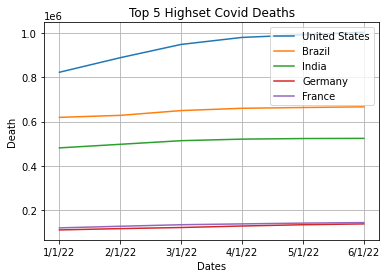

In [40]:

# Identify each country
United_States = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['Country'] == 'United States']
Brazil = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['Country'] == 'Brazil']
India = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['Country'] == 'India']
Germany = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['Country'] == 'Germany']
France = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['Country'] == 'France']

# plot lines
United_States, = plt.plot(United_States['Date'],United_States['Confirmed Deaths'], label='United States')
Brazil, = plt.plot(Brazil['Date'],Brazil['Confirmed Deaths'], label='Brazil')
India, = plt.plot(India['Date'],India['Confirmed Deaths'], label='India')
Germany, = plt.plot(Germany['Date'],Germany['Confirmed Deaths'], label='Germany')
France, = plt.plot(France['Date'],France['Confirmed Deaths'], label='France')

# Set our legend to where the chart thinks is best
plt.legend(handles=[United_States, Brazil, India, Germany, France], loc="best")

# Add in a grid for the chart
plt.grid()

# Add labels and title to plot
plt.xlabel("Dates")
plt.ylabel("Death")
plt.title("Top 5 Highset Covid Deaths")



# save Chart
plt.savefig("Top_5_Timeline_Deaths")

# Display plot
plt.show()


### Top 5 Countries Confirmed Cases

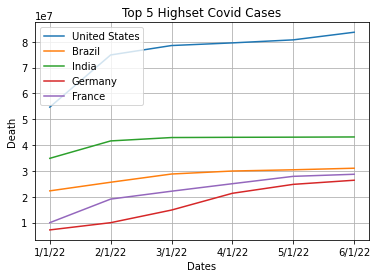

In [42]:

# Identify each country
United_States = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['Country'] == 'United States']
Brazil = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['Country'] == 'Brazil']
India = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['Country'] == 'India']
Germany = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['Country'] == 'Germany']
France = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['Country'] == 'France']

# plot lines
United_States, = plt.plot(United_States['Date'],United_States['Confirmed Cases'], label='United States')
Brazil, = plt.plot(Brazil['Date'],Brazil['Confirmed Cases'], label='Brazil')
India, = plt.plot(India['Date'],India['Confirmed Cases'], label='India')
Germany, = plt.plot(Germany['Date'],Germany['Confirmed Cases'], label='Germany')
France, = plt.plot(France['Date'],France['Confirmed Cases'], label='France')

# Set our legend to where the chart thinks is best
plt.legend(handles=[United_States, Brazil, India, Germany, France], loc="best")

# Add in a grid for the chart
plt.grid()

# Add labels and title to plot
plt.xlabel("Dates")
plt.ylabel("Death")
plt.title("Top 5 Highset Covid Cases")

# save Chart
plt.savefig("Top_5_Timeline_Cases")

# Display plot
plt.show()